In [129]:
#Importamos la librería pandas que necesitamos para la lectura, conversión y limpieza de los datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re 

#Importamos librerías necesarias para la visualización
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro, kstest
from itertools import combinations  # para las medidas de correlación
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames



In [130]:
from src import Functions

In [131]:
#pasar a df

df_flight = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

## Fase 1: Exploración y Limpieza

### 1. Exploración inicial

In [132]:
#pre visualizacion

df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [133]:
#pre visualizacion

df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [134]:
exploracion_datos(df_flight)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None
___________________ FORMA DEL DATAFRAME ____________________

E

In [135]:
exploracion_datos(df_loyalty)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   floa

In [136]:
merge = df_flight.merge(df_loyalty, left_on= 'Loyalty Number', right_on = 'Loyalty Number' )
merge

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999891,2018,8,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405620,999891,2018,9,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405621,999891,2018,10,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405622,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0


### 2. Limpieza de datos

In [137]:
#Eliminar columnas que no sirven para el análisis

columnas_eliminar= ['Flights with Companions', 'Points Redeemed', 'Dollar Cost Points Redeemed','Postal Code', 'CLV', 'Enrollment Type', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month' ]

eliminar_columnas(merge, columnas_eliminar )


,Loyalty Number,Year,Month,Flights Booked,Total Flights,Distance,Points Accumulated,Country,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,Enrollment Year
0,100018,2017,1,3,3,1521,152.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,2016
1,100018,2017,2,2,4,1320,132.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,2016
2,100018,2018,10,6,10,3110,311.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,2016
3,100018,2017,4,4,4,924,92.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,2016
4,100018,2017,5,0,0,0,0.0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999891,2018,8,0,0,0,0.0,Canada,Nova Scotia,Halifax,Female,Bachelor,75616.0,Married,Nova,2016
405620,999891,2018,9,0,0,0,0.0,Canada,Nova Scotia,Halifax,Female,Bachelor,75616.0,Married,Nova,2016
405621,999891,2018,10,0,0,0,0.0,Canada,Nova Scotia,Halifax,Female,Bachelor,75616.0,Married,Nova,2016
405622,999891,2018,11,0,0,0,0.0,Canada,Nova Scotia,Halifax,Female,Bachelor,75616.0,Married,Nova,2016


In [150]:
exploracion_datos(merge)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Year                405624 non-null  int64  
 2   Month               405624 non-null  int64  
 3   Flights Booked      405624 non-null  int64  
 4   Total Flights       405624 non-null  int64  
 5   Distance            405624 non-null  int64  
 6   Points Accumulated  405624 non-null  float64
 7   Country             405624 non-null  object 
 8   Province            405624 non-null  object 
 9   City                405624 non-null  object 
 10  Gender              405624 non-null  object 
 11  Education           405624 non-null  object 
 12  Salary              302952 non-null  float64
 13  Marital Status      405624 non-null  object 
 14  Loyalty Card        40

### Recursos para analizar con que conviene imputar

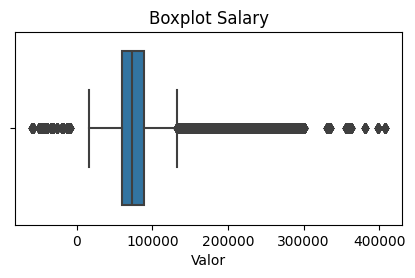

In [151]:
# Boxplot para ver la distribución de datos en la columna Salario para tomar una decisión de
# con qué conviene reemplazar

plt.figure(figsize=(5, 2.5))
sns.boxplot(x=merge['Salary'])
plt.title('Boxplot Salary')
plt.xlabel('Valor')
plt.show()


In [152]:
#media

merge['Salary'].mean()

79268.82595262615

In [153]:
#mediana

merge['Salary'].median()

73479.0

In [154]:
nulos_salario = merge['Salary'].isnull().sum()
nulos_salario

102672

In [155]:
def porcentaje_nulos(nulos, cant_datos):
    promedio = nulos / cant_datos
    return promedio

In [156]:
porcentaje_nulos(nulos_salario, 405624)

0.2531211170936631

In [119]:
#decisión tomada: imputar con la mediana

def imputar_mediana(df, columna):
    #calcular mediana
    mediana = df[columna].median()
    #reemplazar valores 
    df[columna] = df[columna].fillna(mediana)
    #comprobar nulos
    print(f"Después del 'fillna' tenemos {df[columna].isnull().sum()} nulos")

In [120]:
imputar_mediana(merge, 'Salary')

Después del 'fillna' tenemos 0 nulos
